In [2]:
import os
import sys
import urllib.request
import json

ID = input("NAVER API client id를 입력하세요.")
KEY = input("NAVER API client secret을 입력하세요.")


def naver_api(where,what,how): # where은 news, cafearticle, blog ... what은 찾을 검색어
    encText = urllib.parse.quote(what)

    for i in range(1,1001,100):
        # url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
        url = "https://openapi.naver.com/v1/search/" +where+ "?query=" + encText + "&display=100" + "&start=" + str(i)
        
        request = urllib.request.Request(url)
        request.add_header("X-Naver-Client-Id",ID)
        request.add_header("X-Naver-Client-Secret",KEY)
        response = urllib.request.urlopen(request)
        rescode = response.getcode()
        if(rescode==200):
            response_body = response.read()
            result = response_body.decode('utf-8')
            items = json.loads(result)['items']
            for item in items:
                f = open(f"./data/{how}","a",encoding="utf8")
                title = item['title']
                description = item['description']

                title = title.replace('<b>','')
                title = title.replace('</b>','')
                description = description.replace('<b>','')
                description = description.replace('</b>','')
                description = description.replace('...','')



                f.write(title + '\n')
                f.write(description+ '\n')
                f.close()

In [3]:
naver_api("blog","중국","중국.txt")
naver_api("cafearticle","중국","중국.txt")
naver_api("news","중국","중국.txt")


In [4]:
naver_api("blog","일본","일본.txt")
naver_api("cafearticle","일본","일본.txt")
naver_api("news","일본","일본.txt")

In [5]:
naver_api("blog","북한","북한.txt")
naver_api("cafearticle","북한","북한.txt")
naver_api("news","북한","북한.txt")

형태소 분석

In [1]:
f = open('./data/중국.txt','r',encoding="utf8")
txt = f.readlines()
f.close()

In [2]:
from konlpy.tag import Hannanum
hannanum = Hannanum()

# from konlpy.tag import Komoran
# komoran = Komoran(userdic='/tmp/dic.txt')

morph_list = []
for i in txt:
  morphs = hannanum.morphs(i) #morphs
  for morph in morphs:
    morph_list.append(morph)

In [3]:
for i in morph_list:
  f = open("./data/중국형태소.txt",'a',encoding="utf8")
  f.write(i+"\n")
  f.close()

In [4]:
f = open('./data/일본.txt','r',encoding="utf8")
txt = f.readlines()
f.close()

from konlpy.tag import Hannanum
hannanum = Hannanum()

# from konlpy.tag import Komoran
# komoran = Komoran(userdic='/tmp/dic.txt')

morph_list = []
for i in txt:
  morphs = hannanum.morphs(i) #morphs
  for morph in morphs:
    morph_list.append(morph)

for i in morph_list:
  f = open("./data/일본형태소.txt",'a',encoding="utf8")
  f.write(i+"\n")
  f.close()

In [5]:
f = open('./data/북한.txt','r',encoding="utf8")
txt = f.readlines()
f.close()

from konlpy.tag import Hannanum
hannanum = Hannanum()

# from konlpy.tag import Komoran
# komoran = Komoran(userdic='/tmp/dic.txt')

morph_list = []
for i in txt:
  morphs = hannanum.morphs(i) #morphs
  for morph in morphs:
    morph_list.append(morph)

for i in morph_list:
  f = open("./data/북한형태소.txt",'a',encoding="utf8")
  f.write(i+"\n")
  f.close()

불용어 처리

In [1]:

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:

f = open('./data/중국형태소.txt','r',encoding="utf8")
txt = f.readlines()
f.close()

new_txt = []
for i in txt:
    new_txt.append(i.replace("\n",""))
    

new2_txt = []
for i in new_txt:
    new2_txt.append(i.replace("quot",""))

new3_txt = []
for i in new2_txt:
    new3_txt.append(i.replace("gt",""))



str_txt = ""
for i in new3_txt:
    str_txt = str_txt + i + ' '


from collections import Counter
c = Counter(new3_txt).most_common()




In [3]:
print(len(c))
c

23318


[('이', 7748),
 ('중국', 5777),
 ('하', 5070),
 ('ㄴ', 3733),
 ('.', 3579),
 ('는', 3107),
 ('에', 2895),
 ('을', 2761),
 ('의', 2726),
 ('어', 2649),
 ('은', 2610),
 ('가', 2328),
 (',', 2194),
 ('고', 2104),
 ('를', 1632),
 ('있', 1392),
 ('에서', 1371),
 ('아', 1344),
 ('ㄹ', 1272),
 ('도', 1191),
 ('요', 1057),
 ('지', 1040),
 ('으로', 1009),
 ('다', 975),
 ('로', 967),
 ('과', 959),
 ('되', 890),
 ('었다', 764),
 ('보', 760),
 ("'", 759),
 ('나', 664),
 ('?', 653),
 ('기', 618),
 ('ㅂ니다', 596),
 ('것', 586),
 ('게', 574),
 ('면', 573),
 (')', 552),
 ('와', 499),
 ('수', 433),
 ('오', 431),
 ('들', 429),
 ('등', 407),
 ('어서', 395),
 ('미국', 392),
 ('ㅁ', 390),
 ('라', 386),
 ('...', 386),
 ('(', 385),
 ('한국', 382),
 ('대', 360),
 ('러시아', 359),
 ('..', 351),
 ('중', 349),
 ('하고', 336),
 ('알', 317),
 ('서', 316),
 ('많', 307),
 (']', 307),
 ('말', 304),
 ('!', 296),
 ('주', 292),
 ('전', 283),
 ('없', 278),
 ('ㄴ다', 274),
 ('ㄴ데', 271),
 ('-', 267),
 ('만', 251),
 ('자', 251),
 ('/', 243),
 ('일본', 236),
 ('사', 229),
 ('지나', 226),
 ('며', 22

In [8]:
stop = []

for i in range(2331):
    stop.append(c[i][0])

# 필요한 키워드 살리기 
stop.remove("중국")
stop.remove("미국")
stop.remove("한국")
stop.remove("러시아")
stop.remove("일본")
stop.remove("여객기")
stop.remove("북한")
stop.remove("세계")
stop.remove("추락")
stop.remove("시장")
stop.remove("동방항공")
stop.remove("가격")
stop.remove("중국어")
stop.remove("정부")
stop.remove("반대")
stop.remove("우크라")
stop.remove("생각")
stop.remove("코로나19")
stop.remove("ICBM")
stop.remove("우리나라")
stop.remove("발사")
stop.remove("상황")
stop.remove("제재")
stop.remove("대통령")
stop.remove("봉쇄")
stop.remove("올림픽")
stop.remove("베이징")
stop.remove("국내")
stop.remove("안보")
stop.remove("지역")
stop.remove("침공")
stop.remove("추천")
stop.remove("이유")
stop.remove("사람")
stop.remove("함께")
stop.remove("중국인")
stop.remove("드라마")
stop.remove("문제")
stop.remove("영화")
stop.remove("전쟁")
stop.remove("132명")
stop.remove("적")
stop.remove("발표")
stop.remove("인하")
stop.remove("유엔")
stop.remove("기업")
stop.remove("경제")
stop.remove("쇼트트랙")
stop.remove("판매")
stop.remove("홍콩")
stop.remove("현지")
stop.remove("영상")
stop.remove("수출")
stop.remove("탑승객")
stop.remove("확진자")
stop.remove("규탄")
stop.remove("인도")
stop.remove("경기")
stop.remove("사태")
stop.remove("영향")
stop.remove("강화")
stop.remove("평균")
stop.remove("사망")
stop.remove("보도")
stop.remove("입국")
stop.remove("음식")
stop.remove("대표")
stop.remove("격리")
stop.remove("전원")
stop.remove("무산")
stop.remove("준비")
stop.remove("채택")
stop.remove("수입")
stop.remove("책")
stop.remove("제품")
stop.remove("지원")
stop.remove("현장")
stop.remove("나라")
stop.remove("계시")
stop.remove("정책")
stop.remove("성명")
stop.remove("알리")
stop.remove("글로벌")
stop.remove("출처")
stop.remove("행사")
stop.remove("블랙박스")
stop.remove("맛집")
stop.remove("문화")
stop.remove("전망")
stop.remove("오미크론")
stop.remove("여행")
stop.remove("도시")
stop.remove("모습")
stop.remove("발견")
stop.remove("기록")
stop.remove("시간")
stop.remove("이야기")
stop.remove("부동산")
stop.remove("중국유학")
stop.remove("논란")
stop.remove("국가")
stop.remove("온라인")
stop.remove("유럽")
stop.remove("개최")
stop.remove("본토")
stop.remove("진행")
stop.remove("감염자")
stop.remove("중국요리")
stop.remove("상승")
stop.remove("비")
stop.remove("한복")
stop.remove("추진")
stop.remove("중국드라마")
stop.remove("친구")
stop.remove("발생")
stop.remove("유튜브")
stop.remove("생활")
stop.remove("논의")
stop.remove("톈안먼")
stop.remove("중국음식")
stop.remove("여성")
stop.remove("전기차")
stop.remove("성장")
stop.remove("언론")
stop.remove("한국어")
stop.remove("인구")
stop.remove("공장")
stop.remove("윤석열")
stop.remove("시진핑")
stop.remove("에너지")
stop.remove("게임")
stop.remove("회사")
stop.remove("학교")
stop.remove("관계")
stop.remove("여자")





# stop = ['','.','에','의','위' ]

stopwords = set(stop)

ValueError: list.remove(x): x not in list

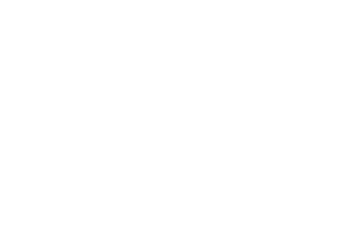

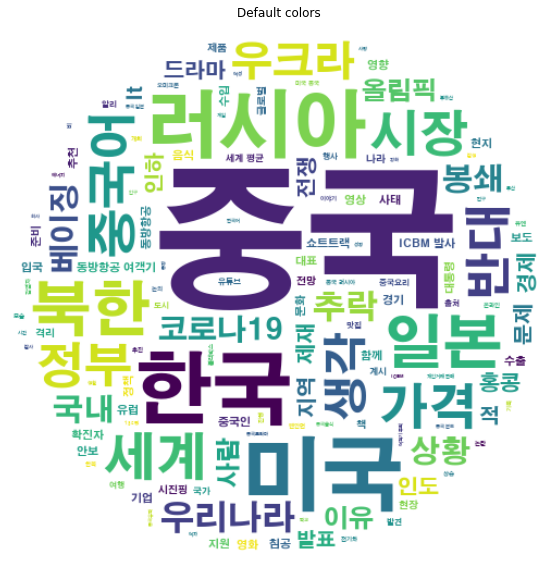

In [5]:
mask1 = np.array(Image.open("./data/수정됨22_동그라미.png"))

wc = WordCloud(background_color="white",font_path="C:\Windows\Fonts\H2GTRE.TTF",max_words=1000, mask=mask1, stopwords=stopwords, margin=10,
               random_state=1,contour_color='black').generate(str_txt)

wc.to_file("중국1차.png")
plt.axis("off")
plt.figure(figsize=(10,10))
plt.title("Default colors")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

일본

In [1]:

import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:

f = open('./data/일본형태소.txt','r',encoding="utf8")
txt = f.readlines()
f.close()

new_txt = []
for i in txt:
    new_txt.append(i.replace("\n",""))
    

new2_txt = []
for i in new_txt:
    new2_txt.append(i.replace("quot",""))

new3_txt = []
for i in new2_txt:
    new3_txt.append(i.replace("gt",""))



str_txt = ""
for i in new3_txt:
    str_txt = str_txt + i + ' '


from collections import Counter
c = Counter(new3_txt).most_common()





In [3]:
print(len(c))
c

24547


[('이', 7094),
 ('일본', 5765),
 ('하', 4782),
 ('ㄴ', 3507),
 ('.', 3389),
 ('는', 3159),
 ('에', 2798),
 (',', 2730),
 ('어', 2515),
 ('을', 2475),
 ('의', 2425),
 ('은', 2417),
 ('가', 2231),
 ('고', 1827),
 ('에서', 1572),
 ('를', 1546),
 ('아', 1331),
 ('있', 1310),
 ('요', 1166),
 ('로', 1161),
 ('도', 1154),
 ('ㄹ', 1119),
 ('으로', 1034),
 ("'", 967),
 ('지', 910),
 ('되', 874),
 ('과', 867),
 ('다', 805),
 ('나', 779),
 ('ㅂ니다', 759),
 ('기', 759),
 ('었다', 754),
 ('보', 711),
 (')', 675),
 ('오', 632),
 ('게', 623),
 ('한국', 588),
 ('?', 562),
 ('와', 550),
 ('것', 495),
 ('면', 453),
 ('어서', 441),
 ('!', 420),
 ('들', 415),
 ('수', 412),
 ('등', 394),
 ('ㅁ', 379),
 ('=====', 364),
 ('(', 356),
 ('라', 355),
 ('중', 349),
 (']', 342),
 ('...', 337),
 ('하고', 335),
 ('서', 332),
 ('[', 328),
 ('만', 318),
 ('많', 298),
 ('주', 298),
 ('ㄴ데', 288),
 ('ㄴ다', 288),
 ('..', 282),
 ('저', 274),
 ('-', 270),
 ('가격', 266),
 ('전', 264),
 ('/', 260),
 ('세', 259),
 ('없', 256),
 ('말', 255),
 ('좋', 250),
 ('알', 245),
 (':', 244),
 ('미국', 2

In [6]:
stop = []

for i in range(24547):
    stop.append(c[i][0])

# 필요한 키워드 살리기 
stop.remove("일본")
stop.remove("한국")
stop.remove("가격")
stop.remove("미국")
stop.remove("여행")
stop.remove("판매")
stop.remove("개인거래(판매),")
stop.remove("일본구매대행")
stop.remove("세계")
stop.remove("직접결제")
stop.remove("입국")
stop.remove("일본대학")
stop.remove("국내")
stop.remove("도쿄")
stop.remove("경기")
stop.remove("생각")
stop.remove("호주")
stop.remove("함께")
stop.remove("시작")
stop.remove("가능")
stop.remove("추천")
stop.remove("문화")
stop.remove("대회")
stop.remove("이야기")
stop.remove("일본인")
stop.remove("일본어")
stop.remove("구매")
stop.remove("공개")
stop.remove("지진")
stop.remove("우리나라")
stop.remove("발생")
stop.remove("사람")
stop.remove("영화")
stop.remove("계시")
stop.remove("러시아")
stop.remove("아오키")
stop.remove("승리")
stop.remove("지역")
stop.remove("안보")
stop.remove("북한")
stop.remove("기록")
stop.remove("드라마")
stop.remove("사용")
stop.remove("사이트")
stop.remove("브랜드")
stop.remove("ICBM")
stop.remove("규모")
stop.remove("시간")
stop.remove("데뷔")
stop.remove("평균")
stop.remove("후기")
stop.remove("확진자")
stop.remove("입시센터")
stop.remove("메루카리")
stop.remove("이유")
stop.remove("일상")
stop.remove("준비")
stop.remove("취업")
stop.remove("추성훈")
stop.remove("소개")
stop.remove("제품")
stop.remove("맛집")
stop.remove("약")
stop.remove("출처")
stop.remove("유튜브")
stop.remove("사랑")
stop.remove("일본생활")
stop.remove("영상")
stop.remove("인기")
stop.remove("총리")
stop.remove("카페")
stop.remove("한국어")
stop.remove("1위")
stop.remove("상황")
stop.remove("구매대행")
stop.remove("정보")
stop.remove("광고")
stop.remove("글로벌")
stop.remove("알리")
stop.remove("우승")
stop.remove("유럽")
stop.remove("세계선수권")
stop.remove("생활")
stop.remove("진출")
stop.remove("운영")
stop.remove("영국")
stop.remove("월드컵")
stop.remove("유명")
stop.remove("현지")
stop.remove("발표")
stop.remove("요리")
stop.remove("전쟁")
stop.remove("사진")
stop.remove("일본유학")
stop.remove("파친코")
stop.remove("싱가포르")
stop.remove("직구")
stop.remove("질문")
stop.remove("방문")
stop.remove("대학")
stop.remove("정부")
stop.remove("이용")
stop.remove("시즌")
stop.remove("관심")
stop.remove("판매완료")
stop.remove("/일본배송대행")
stop.remove("방법")
stop.remove("상태")
stop.remove("비")
stop.remove("작품")
stop.remove("TKO")
stop.remove("포함")
stop.remove("오사카")
stop.remove("역사")
stop.remove("회사")
stop.remove("책")
stop.remove("프로젝트")
stop.remove("홋카이")
stop.remove("배우")
stop.remove("뮤직")
stop.remove("학원")
stop.remove("호텔")
stop.remove("일본라멘")
stop.remove("도착")
stop.remove("욱일기")
stop.remove("감독")
stop.remove("친구")
stop.remove("유학")
stop.remove("제작")
stop.remove("기업")
stop.remove("법인등록")
stop.remove("발사")
stop.remove("라면")
stop.remove("구입")
stop.remove("외국")
stop.remove("해외")
stop.remove("대표")
stop.remove("외무성")
stop.remove("공동")
stop.remove("편의점")
stop.remove("상품")
stop.remove("코로나19")
stop.remove("대통령")
stop.remove("앨범")
stop.remove("공부")
stop.remove("시장")
stop.remove("검사")
stop.remove("여자")
stop.remove("넷플릭스")
stop.remove("백신")
stop.remove("경험")
stop.remove("기자단")
stop.remove("신뢰")
stop.remove("믿음")
stop.remove("복귀전")
stop.remove("자가격리")
stop.remove("우크라")
stop.remove("아시아")
stop.remove("생기")
stop.remove("화")
stop.remove("피겨")
stop.remove("음식")
stop.remove("결과")
stop.remove("나이")

# stop = ['','.','에','의','위' ]

stopwords = set(stop)

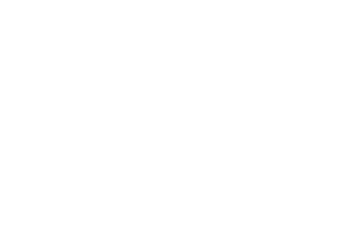

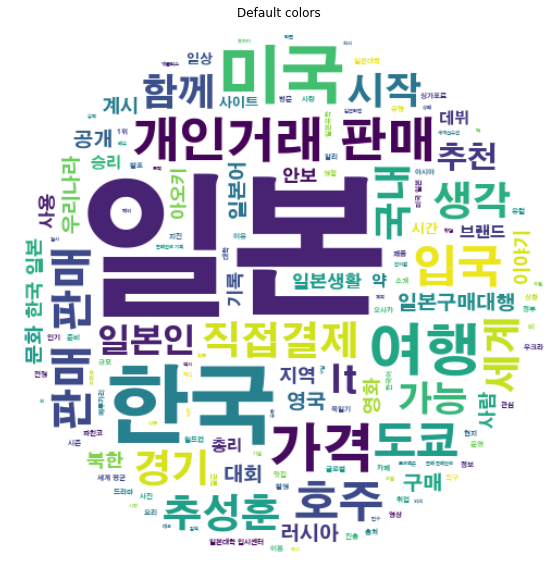

In [7]:
mask1 = np.array(Image.open("./data/수정됨22_동그라미.png"))

wc = WordCloud(background_color="white",font_path="C:\Windows\Fonts\H2GTRE.TTF",max_words=1000, mask=mask1, stopwords=stopwords, margin=10,
               random_state=1,contour_color='black').generate(str_txt)

wc.to_file("일본1차.png")
plt.axis("off")
plt.figure(figsize=(10,10))
plt.title("Default colors")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

북한

In [1]:
import numpy as np

import os
import re
from PIL import Image
from os import path
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:

f = open('./data/북한형태소.txt','r',encoding="utf8")
txt = f.readlines()
f.close()

new_txt = []
for i in txt:
    new_txt.append(i.replace("\n",""))
    

new2_txt = []
for i in new_txt:
    new2_txt.append(i.replace("quot",""))

new3_txt = []
for i in new2_txt:
    new3_txt.append(i.replace("gt",""))



str_txt = ""
for i in new3_txt:
    str_txt = str_txt + i + ' '


from collections import Counter
c = Counter(new3_txt).most_common()





In [3]:
print(len(c))
c

20632


[('이', 8452),
 ('북한', 5916),
 ('하', 5454),
 ('ㄴ', 4266),
 ('의', 3980),
 ('.', 3463),
 ('을', 3241),
 ('는', 3097),
 ('은', 2878),
 ('에', 2770),
 ('어', 2735),
 (',', 2244),
 ('고', 1980),
 ('가', 1948),
 ('ㄹ', 1742),
 ('를', 1727),
 ('도', 1344),
 ('있', 1284),
 ('과', 1254),
 ('아', 1241),
 ('에서', 1115),
 ('으로', 1045),
 ('지', 1032),
 ('되', 979),
 ('?', 943),
 ('발사', 881),
 ('기', 853),
 ('보', 830),
 ('요', 826),
 ('었다', 795),
 ("'", 791),
 ('로', 756),
 ('다', 752),
 ('게', 717),
 ('것', 670),
 ('ㅂ니다', 579),
 ('와', 556),
 ('ICBM', 555),
 ('나', 543),
 ('면', 476),
 ('라', 449),
 ('등', 448),
 (')', 415),
 ('ㅁ', 404),
 ('하고', 404),
 ('미국', 394),
 ('수', 369),
 (';', 367),
 ('...', 362),
 ('중국', 331),
 (':', 329),
 ('들', 329),
 ('오', 327),
 ('었습니다', 323),
 ('ㄴ다', 321),
 ('도발', 315),
 ('대륙간탄도미사일(ICBM)', 310),
 ('전', 305),
 ('!', 294),
 ('-', 292),
 (']', 290),
 ('중', 290),
 ('미사', 286),
 ('위하', 278),
 ('/', 276),
 ('말', 276),
 ('대하', 275),
 ('내', 274),
 ('며', 257),
 ('대', 257),
 ('안보', 257),
 ('[', 257),
 ('문

In [7]:
stop = []

for i in range(20632):
    stop.append(c[i][0])

# 필요한 키워드 살리기 
stop.remove("북한")
stop.remove("발사")
stop.remove("ICBM")
stop.remove("미국")
stop.remove("중국")
stop.remove("도발")
stop.remove("대륙간탄도미사일(ICBM)")
stop.remove("안보")
stop.remove("문제")
stop.remove("유엔")
stop.remove("대통령")
stop.remove("규탄")
stop.remove("정부")
stop.remove("천안함")
stop.remove("신형")
stop.remove("시험")
stop.remove("현안")
stop.remove("남한")
stop.remove("한국")
stop.remove("당선인")
stop.remove("시험발사")
stop.remove("북한이탈주민")
stop.remove("상황")
stop.remove("피격")
stop.remove("대표단")
stop.remove("대응")
stop.remove("러시아")
stop.remove("강화")
stop.remove("미사일")
stop.remove("윤석열")
stop.remove("당선")
stop.remove("회동")
stop.remove("대륙간탄도미사일")
stop.remove("일")
stop.remove("생각")
stop.remove("논의")
stop.remove("이유")
stop.remove("일본")
stop.remove("음식")
stop.remove("대북")
stop.remove("성공")
stop.remove("노동신문")
stop.remove("제재")
stop.remove("공개")
stop.remove("모습")
stop.remove("우리나라")
stop.remove("탄도미사일")
stop.remove("우크라")
stop.remove("반대")
stop.remove("핵")
stop.remove("공격")
stop.remove("영상")
stop.remove("이야기")
stop.remove("위협")
stop.remove("세계")
stop.remove("경제")
stop.remove("평양")
stop.remove("기사")
stop.remove("발사체")
stop.remove("주민들")
stop.remove("함께")
stop.remove("전쟁")
stop.remove("한미")
stop.remove("대변인")
stop.remove("기관지")
stop.remove("성명")
stop.remove("채택")
stop.remove("대한민국")
stop.remove("화성-17형")
stop.remove("판매")
stop.remove("정권")
stop.remove("민주당")
stop.remove("국무위원장")
stop.remove("동아시아")
stop.remove("안보리")
stop.remove("한미동맹,")
stop.remove("노동당")
stop.remove("보도")
stop.remove("글로벌")
stop.remove("안전보장이사회")
stop.remove("시작")
stop.remove("가능성")
stop.remove("대표")
stop.remove("행정부")
stop.remove("영화")
stop.remove("남북")
stop.remove("지원")
stop.remove("김정은")
stop.remove("여행")
stop.remove("12주")
stop.remove("정책")
stop.remove("강조")
stop.remove("가격")
stop.remove("언론성명")
stop.remove("핵실험")
stop.remove("우려")
stop.remove("무산")
stop.remove("뉴스")
stop.remove("사진")
stop.remove("동해상")
stop.remove("분석")
stop.remove("코로나19")
stop.remove("부통령")
stop.remove("사회")
stop.remove("4년")
stop.remove("진행")
stop.remove("청와대")
stop.remove("개인거래(판매),")
stop.remove("국민의힘")
stop.remove("정책협의")
stop.remove("문화")
stop.remove("우표")
stop.remove("방안")
stop.remove("인사들")
stop.remove("파견")
stop.remove("회의")
stop.remove("확산")
stop.remove("관계")
stop.remove("책")
stop.remove("뉴욕")
stop.remove("의회")
stop.remove("주민")
stop.remove("통일부")
stop.remove("긴장")
stop.remove("사용")
stop.remove("비난")
stop.remove("지역")
stop.remove("정세")
stop.remove("북한우표")
stop.remove("한미동맹")
stop.remove("유엔본부")
stop.remove("개발")
stop.remove("의미")
stop.remove("차")
stop.remove("나라")
stop.remove("강력")
stop.remove("변화")
stop.remove("역사")
stop.remove("주장")
stop.remove("통일")
stop.remove("확인")
stop.remove("사과")
stop.remove("공개회의")
stop.remove("평화")
stop.remove("언론")
stop.remove("국방부")
stop.remove("발표")
stop.remove("내용")
stop.remove("의견")
stop.remove("가능")
stop.remove("관심")
stop.remove("국민")
stop.remove("추정")
stop.remove("인하")
stop.remove("경제안보")
stop.remove("화성")
stop.remove("의지")
stop.remove("풍계리")
stop.remove("직접결제")
stop.remove("잠수정")
stop.remove("싱크탱크")
stop.remove("국가")
stop.remove("땅")
stop.remove("서해수호")
stop.remove("굴")
stop.remove("개최")
stop.remove("국제사회")
stop.remove("출범")
stop.remove("남북한")
stop.remove("조선노동당")
stop.remove("비핵화")
stop.remove("선전매체")
stop.remove("북한문제")
stop.remove("한반도")
stop.remove("개")
stop.remove("해결")
stop.remove("결론")
stop.remove("매체")
stop.remove("언급")
stop.remove("체제")
stop.remove("북한음식")
stop.remove("일괄")
stop.remove("양측")
stop.remove("같이")
stop.remove("미래")
stop.remove("군사력")


# stop = ['','.','에','의','위' ]

stopwords = set(stop)

ValueError: list.remove(x): x not in list

In [ ]:
mask1 = np.array(Image.open("./data/수정됨22_동그라미.png"))

wc = WordCloud(background_color="white",font_path="C:\Windows\Fonts\H2GTRE.TTF",max_words=1000, mask=mask1, stopwords=stopwords, margin=10,
               random_state=1,contour_color='black').generate(str_txt)

wc.to_file("북한1차.png")
plt.axis("off")
plt.figure(figsize=(10,10))
plt.title("Default colors")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()